The purpose of this project is to utilize Python and analyze my spending habits through the Amazon website. 

We can all relate that we actually spend our hard earned cash on Amazon a lot more than we'd like to admit. I'm excited and terrified at what I'm going to find

# Collecting the Data

- I originally was able to get my data by going to My Account > Order History report but it seems that option isn't there anymore.

- You will have to google "Amazon Order History report" and navigate to their help page to get the link that takes you to the Order History report

- I've moved the data to my home folder

In [184]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
ap = pd.read_csv("My Amazon Spending.csv")

# Cleaning the Data

In [186]:
# Remove irrelevant columns to our calculations

new_ap = ap.drop(["Title", "ASIN/ISBN", "UNSPSC Code", "Website", "Release Date", "Condition", "Seller", 
                 "Seller Credentials",
                                      "Payment Instrument Type", "Purchase Order Number", "PO Line Number", 
                 "Ordering Customer Email",
                                      "Shipment Date", "Shipping Address Name", "Shipping Address Street 1",
                "Shipping Address Street 2",
                                      "Shipping Address City", "Shipping Address State", "Shipping Address Zip",
                "Order Status", 
                                      "Carrier Name & Tracking Number", "Tax Exemption Type", "Tax Exemption Applied",
                "Exemption Opt-Out",
                                      "Buyer Name", "Currency", "Group Name"], axis = 1)

new_ap

,Order Date,Order ID,Category,List Price Per Unit,Purchase Price Per Unit,Quantity,Item Subtotal,Item Subtotal Tax,Item Total
0,08/09/13,109-5300853-5913011,ABIS_BOOK,$89.95,$56.21,1,$56.21,$0.00,$56.21
1,08/09/13,109-6648366-1394606,ABIS_BOOK,$0.00,$36.04,1,$36.04,$0.00,$36.04
2,08/09/13,109-9173981-0577033,ABIS_BOOK,$23.99,$22.79,1,$22.79,$2.02,$24.81
3,08/09/13,109-9173981-0577033,ABIS_BOOK,$25.99,$22.51,1,$22.51,$2.00,$24.51
4,08/09/13,109-9173981-0577033,ABIS_BOOK,$47.99,$40.41,1,$40.41,$3.59,$44.00
...,...,...,...,...,...,...,...,...,...
149,01/28/20,114-3092308-1475437,ARTIFICIAL_PLANT,$18.99,$11.98,4,$47.92,$4.24,$52.16
150,01/28/20,111-9680111-5107455,BEAUTY,$0.00,$4.99,1,$4.99,$0.44,$5.43
151,02/19/20,111-6978627-3892202,PUZZLES,$0.00,$15.99,1,$15.99,$1.42,$17.41
152,02/19/20,111-6978627-3892202,PUZZLES,$0.00,$18.99,1,$18.99,$1.69,$20.68


In [187]:
new_ap.dtypes

Order Date                 object
Order ID                   object
Category                   object
List Price Per Unit        object
Purchase Price Per Unit    object
Quantity                    int64
Item Subtotal              object
Item Subtotal Tax          object
Item Total                 object
dtype: object

- I will be working a lot of calculations with this data. All of the datatypes that involve pricing are in object. I will need to convert them to float. 

In [188]:
#change data types

new_ap['List Price Per Unit'] = new_ap['List Price Per Unit'].str.replace('[\$,]', '', regex=True).astype(float)
new_ap['Purchase Price Per Unit'] = new_ap['Purchase Price Per Unit'].str.replace('[\$,]', '', regex=True).astype(float)
new_ap['Item Subtotal'] = new_ap['Item Subtotal'].str.replace('[\$,]', '', regex=True).astype(float)
new_ap['Item Subtotal Tax'] = new_ap['Item Subtotal Tax'].str.replace('[\$,]', '', regex=True).astype(float)
new_ap['Item Total'] = new_ap['Item Total'].str.replace('[\$,]', '', regex=True).astype(float)

new_ap.dtypes

Order Date                  object
Order ID                    object
Category                    object
List Price Per Unit        float64
Purchase Price Per Unit    float64
Quantity                     int64
Item Subtotal              float64
Item Subtotal Tax          float64
Item Total                 float64
dtype: object

- Some of the questions I want to calculate will involve yearly and monthly calculations. I'll need to split the date into multiple columns to get what we need

In [189]:
# Split date into multiple columns

new_ap['Order Date'] = pd.to_datetime(new_ap['Order Date'])
new_ap['Year'] = new_ap['Order Date'].dt.year
new_ap['Month'] = new_ap['Order Date'].dt.month
new_ap['Day'] = new_ap['Order Date'].dt.day

new_ap = new_ap.drop('Order Date', axis = 1)

new_Order = ['Month', 'Day', 'Year', 'Order ID', 'Quantity', 'Category',
          'List Price Per Unit', 'Purchase Price Per Unit', 'Item Subtotal',
         'Item Subtotal Tax', 'Item Total']

new_ap = new_ap[new_Order]

new_ap

,Month,Day,Year,Order ID,Quantity,Category,List Price Per Unit,Purchase Price Per Unit,Item Subtotal,Item Subtotal Tax,Item Total
0,8,9,2013,109-5300853-5913011,1,ABIS_BOOK,89.95,56.21,56.21,0.00,56.21
1,8,9,2013,109-6648366-1394606,1,ABIS_BOOK,0.00,36.04,36.04,0.00,36.04
2,8,9,2013,109-9173981-0577033,1,ABIS_BOOK,23.99,22.79,22.79,2.02,24.81
3,8,9,2013,109-9173981-0577033,1,ABIS_BOOK,25.99,22.51,22.51,2.00,24.51
4,8,9,2013,109-9173981-0577033,1,ABIS_BOOK,47.99,40.41,40.41,3.59,44.00
...,...,...,...,...,...,...,...,...,...,...,...
149,1,28,2020,114-3092308-1475437,4,ARTIFICIAL_PLANT,18.99,11.98,47.92,4.24,52.16
150,1,28,2020,111-9680111-5107455,1,BEAUTY,0.00,4.99,4.99,0.44,5.43
151,2,19,2020,111-6978627-3892202,1,PUZZLES,0.00,15.99,15.99,1.42,17.41
152,2,19,2020,111-6978627-3892202,1,PUZZLES,0.00,18.99,18.99,1.69,20.68


# Evaluating My Data

What I want to know:
- My average yearly and monthly spending on Amazon

I have a feeling I won't like these numbers

In [190]:
# Get list of all the unique years in the column
yearsList = new_ap['Year'].value_counts().index.tolist()

# print(yearsList)
yearsList

[2015, 2017, 2016, 2014, 2019, 2020, 2018, 2013]

In [191]:
# Seems the list isn't in order so we'll just rearrage it to how we want it

yearsList = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

yearsList

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

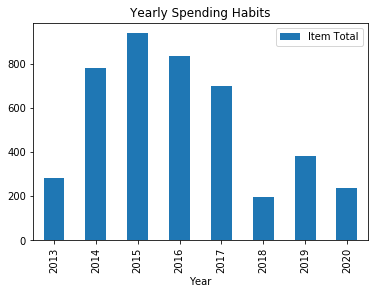

In [192]:
# Yearly Spending

AP_YearlySpending = new_ap.groupby('Year').sum()
AP_YearlySpending = AP_YearlySpending.drop(['Month', 'Day','Quantity',
                        'List Price Per Unit', 'Item Subtotal Tax',
                        'Purchase Price Per Unit', 'Item Subtotal'], axis=1)

ax = AP_YearlySpending.plot(kind='bar')
ax.set_title("Yearly Spending Habits");

From the bar graph above, it seems the spending steadily increased the first three years of me being an Amazon member before it slowly started to decline in 2015. The spending gap between 2017 and after is quite high. 

In [193]:
AP_YearlySpending.describe()

,Item Total
count,8.000000
mean,544.136250
std,299.452371
min,197.910000
25%,272.712500
50%,539.490000
75%,794.620000
max,937.670000


From the statistics, it looks like my spending average was about $544 but we can see that there's a slight right skew in the graph that led to the average. If we isolate the years 2018, 2019, 2020, the average would definitely be higher.

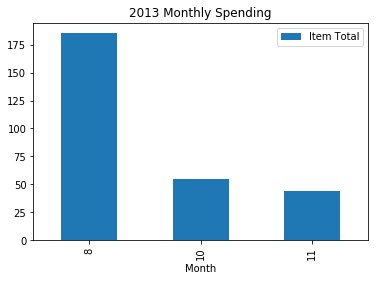

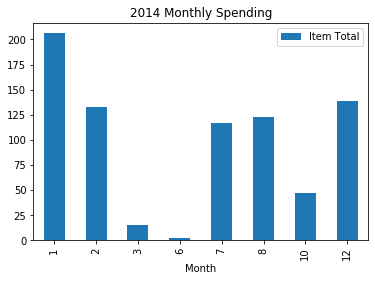

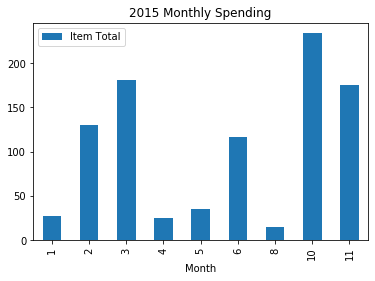

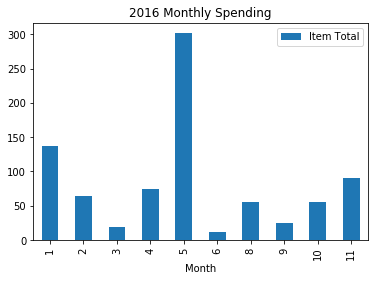

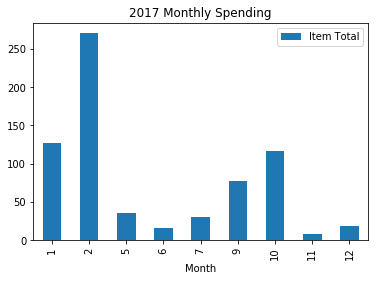

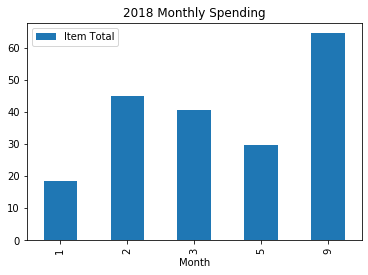

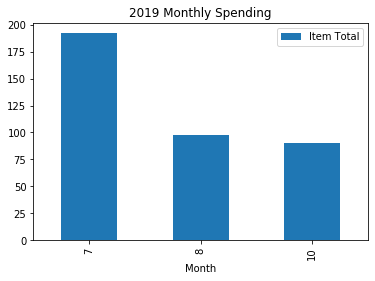

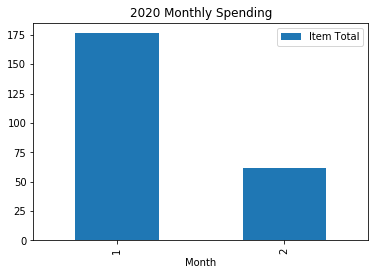

In [194]:
# Monthly Spending by Year

for i in range(len(yearsList)):
    AP_monthly = new_ap.loc[new_ap['Year'] == yearsList[i]]

    AP_monthlySpending = AP_monthly.groupby('Month').sum()
    AP_monthlySpending = AP_monthlySpending.drop(['Year', 'Day','Quantity',
                        'List Price Per Unit', 'Item Subtotal Tax',
                        'Purchase Price Per Unit', 'Item Subtotal'], axis=1)

    ax = AP_monthlySpending.plot(kind='bar')
    ax.set_title( str(yearsList[i]) +  ' Monthly Spending')
    ax = ax.plot(kind='bar', figsize=(20,10))
    plt.show()

At this point, I want to know: 
- What would be the new statistics between 2013 and 2017? 
- what category of items were bought between 2013 and 2017 that contributes to such high spending?

In [195]:
#Trying to extract only the data between 2013-2017
#We first find what row does 2018 start and extract the previous rows to get 2013 - 2017

cond_ = (new_ap["Year"]==2018)
new_ap.loc[cond_,]

,Month,Day,Year,Order ID,Quantity,Category,List Price Per Unit,Purchase Price Per Unit,Item Subtotal,Item Subtotal Tax,Item Total
125,1,17,2018,111-8667561-8051450,1,ABIS_BOOK,117.22,18.51,18.51,0.00,18.51
126,2,2,2018,111-9242622-6753809,1,NaN,24.99,6.99,6.99,0.00,6.99
127,2,2,2018,111-9242622-6753809,1,COMPUTER_INPUT_DEVICE,59.99,37.87,37.87,0.00,37.87
128,3,14,2018,114-2314508-4629851,1,NaN,0.00,37.55,37.55,3.00,40.55
129,5,2,2018,111-4649017-9333820,1,NaN,0.00,11.65,11.65,0.93,12.58
130,5,8,2018,111-9438305-9025004,1,NaN,0.00,16.99,16.99,0.00,16.99
131,9,25,2018,111-7206559-4216238,1,ABIS_BOOK,49.99,49.99,49.99,4.44,54.43
132,9,25,2018,111-7206559-4216238,1,BEAUTY,0.00,9.99,9.99,0.00,9.99


The Year 2018 starts on row 125, or index 124. Therefore, we extract the data to index 124

In [196]:
#College_spend will be the data from 2013-2017

College_spend = new_ap.loc[:124]
College_spend

,Month,Day,Year,Order ID,Quantity,Category,List Price Per Unit,Purchase Price Per Unit,Item Subtotal,Item Subtotal Tax,Item Total
0,8,9,2013,109-5300853-5913011,1,ABIS_BOOK,89.95,56.21,56.21,0.00,56.21
1,8,9,2013,109-6648366-1394606,1,ABIS_BOOK,0.00,36.04,36.04,0.00,36.04
2,8,9,2013,109-9173981-0577033,1,ABIS_BOOK,23.99,22.79,22.79,2.02,24.81
3,8,9,2013,109-9173981-0577033,1,ABIS_BOOK,25.99,22.51,22.51,2.00,24.51
4,8,9,2013,109-9173981-0577033,1,ABIS_BOOK,47.99,40.41,40.41,3.59,44.00
...,...,...,...,...,...,...,...,...,...,...,...
120,10,16,2017,113-2880244-2762666,1,BEAUTY,0.00,24.79,24.79,0.00,24.79
121,10,18,2017,111-0334804-9387459,1,VITAMIN,10.49,7.19,7.19,0.00,7.19
122,10,18,2017,111-1932844-6189052,1,BEAUTY,11.00,7.59,7.59,0.61,8.20
123,11,5,2017,111-9560422-2531414,1,WRITING_INSTRUMENT,6.99,6.99,6.99,0.56,7.55


In [197]:
AP_CollegeSpending = College_spend.groupby('Year').sum()
AP_CollegeSpending = AP_CollegeSpending.drop(['Month', 'Day','Quantity',
                        'List Price Per Unit', 'Item Subtotal Tax',
                        'Purchase Price Per Unit', 'Item Subtotal'], axis=1)

AP_CollegeSpending.describe()

,Item Total
count,5.000000
mean,707.406000
std,251.922329
min,284.370000
25%,698.570000
50%,781.030000
75%,835.390000
max,937.670000


In [198]:
AP_YearlySpending.describe()

,Item Total
count,8.000000
mean,544.136250
std,299.452371
min,197.910000
25%,272.712500
50%,539.490000
75%,794.620000
max,937.670000


Looking at the statistics, I can see that my average spending was much higher than my overall spending on Amazon by an average difference of 163.26975 or $163. Now I'm curious what I've spent the most on.

In [199]:
# What category type did I buy the most during college

Category_list = College_spend['Category'].value_counts()

Category_list

ABIS_BOOK                  37
TOYS_AND_GAMES             11
HEALTH_PERSONAL_CARE        6
BOARD_GAME                  5
PHOTOGRAPHIC_FILM           4
KITCHEN                     4
BEAUTY                      4
SCARF                       3
STICKER_DECAL               3
WIRELESS_ACCESSORY          3
SHOES                       3
COMPUTER_ADD_ON             2
GROCERY                     2
WRITING_INSTRUMENT          2
HOME                        2
CE_CARRYING_CASE_OR_BAG     1
AMAZON_BOOK_READER          1
COMPUTER_COMPONENT          1
OFFICE_PRODUCTS             1
SUGAR_CANDY                 1
PHONE_ACCESSORY             1
PRINTER                     1
ADULT_COSTUME               1
DRINKING_CUP                1
CARRYING_CASE_OR_BAG        1
COMPUTER_INPUT_DEVICE       1
BACKPACK                    1
BAKEWARE                    1
SPORTING_GOODS              1
POWER_BANK                  1
CAMERA_BAGS_AND_CASES       1
BATTERY                     1
HAIRBAND                    1
NOTEBOOK_C

It seems that books were purchased the most during this time frame